In [67]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [68]:
dataset = 'model/keypoint_classifier/normalized_keypoint2.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier2.keras'

In [69]:
NUM_CLASSES = 26

In [70]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [71]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [74]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                2752      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 26)                858       
                                                                 
Total params: 5,690
Trainable params: 5,690
Non-trainable params: 0
_________________________________________________________________


In [75]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [76]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [77]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/9 [==>...........................] - ETA: 1s - loss: 3.2618 - accuracy: 0.1016
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier2.keras
9/9 [==============================] - 0s 9ms/step - loss: 3.2873 - accuracy: 0.0534 - val_loss: 3.2491 - val_accuracy: 0.0800
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 3.2395 - accuracy: 0.0469
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier2.keras
9/9 [==============================] - 0s 3ms/step - loss: 3.2476 - accuracy: 0.0496 - val_loss: 3.2152 - val_accuracy: 0.1171
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 3.2098 - accuracy: 0.0469
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier2.keras
9/9 [==============================] - 0s 3ms/step - loss: 3.2091 - accuracy: 0.0753 - val_loss: 3.1842 - val_accuracy: 0.1257
Epoch 4/1000
1/9 [==>...........................] - ETA: 0s - loss: 3.1575 - accuracy: 0.0938
Epoch 4: 

In [78]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 772us/step - loss: 0.9933 - accuracy: 0.7343


In [79]:

model = tf.keras.models.load_model(model_save_path)

In [80]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 22ms/step
[1.9295443e-08 5.3015685e-09 2.0023324e-05 2.7836625e-08 2.9641222e-02
 1.8728361e-01 5.4823916e-02 1.0862951e-05 2.6386881e-02 1.2402154e-03
 2.9841808e-03 4.6389203e-05 1.8295255e-03 8.0451493e-05 6.8802398e-01
 4.7159853e-04 9.3564513e-06 4.2787327e-05 1.8275392e-04 9.3302360e-06
 5.0042421e-03 4.5294532e-06 8.8302157e-04 2.6357060e-07 1.0019782e-03
 1.8859731e-05]
14


11/11 [==============================] - 0s 363us/step


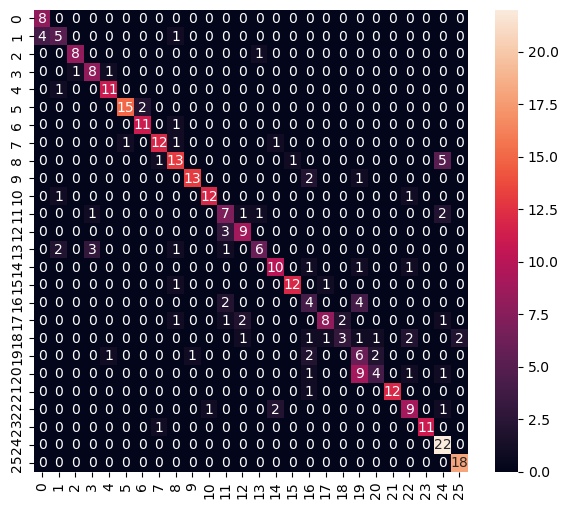

Classification Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       0.56      0.50      0.53        10
           2       0.89      0.89      0.89         9
           3       0.67      0.80      0.73        10
           4       0.85      0.92      0.88        12
           5       0.94      0.88      0.91        17
           6       0.85      0.92      0.88        12
           7       0.86      0.80      0.83        15
           8       0.68      0.65      0.67        20
           9       0.93      0.81      0.87        16
          10       0.92      0.86      0.89        14
          11       0.50      0.58      0.54        12
          12       0.69      0.75      0.72        12
          13       0.75      0.46      0.57        13
          14       0.77      0.77      0.77        13
          15       0.92      0.86      0.89        14
          16       0.33      0.40      0.36        10
     

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [82]:

model.save(model_save_path, include_optimizer=False)

In [83]:

tflite_save_path = 'model/keypoint_classifier/keypoint_classifier2.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/kd/rkdh2ckn6y313ps39rr1p3p80000gn/T/tmpi0nm40eu/assets


INFO:tensorflow:Assets written to: /var/folders/kd/rkdh2ckn6y313ps39rr1p3p80000gn/T/tmpi0nm40eu/assets
2024-12-15 18:21:56.910541: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-12-15 18:21:56.910717: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-12-15 18:21:56.911723: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/kd/rkdh2ckn6y313ps39rr1p3p80000gn/T/tmpi0nm40eu
2024-12-15 18:21:56.912655: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-12-15 18:21:56.912662: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/kd/rkdh2ckn6y313ps39rr1p3p80000gn/T/tmpi0nm40eu
2024-12-15 18:21:56.916467: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2024-12-15 18:21:56.950782: I tensorflow/cc/saved_model/loader.cc:213] Running initialization

10816

In [84]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


In [85]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [86]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [87]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 324 μs, sys: 642 μs, total: 966 μs
Wall time: 1.02 ms


In [88]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.8748588e-08 5.0317173e-09 2.0472982e-05 2.5397243e-08 2.7916215e-02
 1.8417425e-01 5.2152812e-02 1.0036025e-05 2.5068408e-02 1.1853788e-03
 2.9384745e-03 4.3084230e-05 1.6802059e-03 7.5587057e-05 6.9732291e-01
 4.3523262e-04 9.0612866e-06 4.0057097e-05 1.7262989e-04 8.9445975e-06
 4.8594452e-03 4.2509391e-06 8.8347052e-04 2.3430789e-07 9.8157965e-04
 1.7307586e-05]
14
